# Lorenz real system (paper version)

$$
\begin{split}
\dot{x} &= \sigma(y-x)\\
\dot{y} &= x(\rho-z)-y\\
\dot{z} &= xy - \beta z
\end{split}
$$

### computation by single value of $rho$

In [1]:
#######################################################################
# I M P O R T   L I B R A R I E S
#######################################################################
import math     as math
import numpy    as np
import matplotlib.pyplot as plt              
from reservoirpy.datasets import lorenz
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [2]:
#######################################################################
# G R A P H I C S   R O U T I N E S
#######################################################################
def plot_data(X , my_title, step_from, step_to, my_lw):
    fig, axs = plt.subplots(3, 1, figsize=(8, 8))  
    # Plot data on each subplot
    timesteps = [*range(step_from, step_to, 1)]

    # add a secondary scale on variable x 
    ax = axs[0].secondary_xaxis('top', functions=(lambda x: dt * x, lambda x: x / dt), color = 'darkgreen')
    # set label only on variable x
    ax.set_xlabel('time')
   
    axs[0].plot(timesteps, X[step_from:step_to,0], label="x", color='C0', lw=my_lw)
    axs[0].set_ylabel("x")
    axs[0].set_title(my_title)

    # add a secondary scale on variable x 
    ax = axs[1].secondary_xaxis('top', functions=(lambda x: dt * x, lambda x: x / dt), color = 'darkgreen')
    
    axs[1].plot(timesteps, X[step_from:step_to,1], label="y", color='r',  lw=my_lw)
    axs[1].set_ylabel("y")

    # add a secondary scale on variable x 
    ax = axs[2].secondary_xaxis('top', functions=(lambda x: dt * x, lambda x: x / dt), color = 'darkgreen')
    
    axs[2].plot(timesteps, X[step_from:step_to,2], label="z", color='g',  lw=my_lw)
    axs[2].set_ylabel("z")
    
    # set label only on variable z
    axs[2].set_xlabel("timestep")

    fig.tight_layout()
    plt.show()
   

In [3]:
#######################################################################
# G E N E R A T I N G   D A T A S E T
#######################################################################
dt            = 0.01 # time step duration (in time unit, aka delta_t)
duration_time = 125  # duration time

# Lorenz parameters
n_timesteps = round(duration_time / dt)
rho         = 24.058
sigma       = 10.0
beta        = 8./3.
h           = dt     
x0 = [0. , 1., 0. ] # initial condition according to Lorenz's paper (1963)

# Other (optional) parameters to pass to the scipy.integrate.solve_ivp solver
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
method = 'LSODA'
atol   = np.ones(3) * 1e-12
rtol   = 1e-12
X      = lorenz(n_timesteps, rho, sigma, beta, x0, h,
                method = method, atol = atol, rtol = rtol)


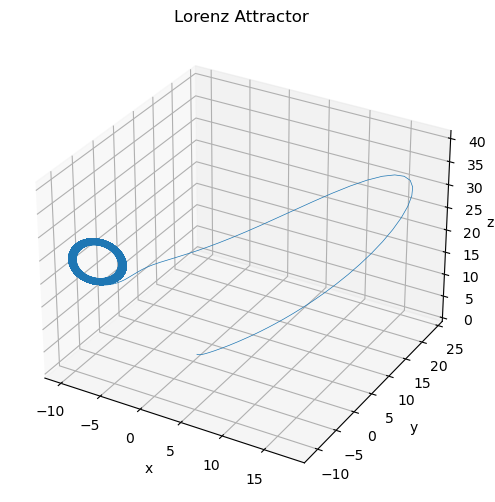

In [4]:
#######################################################################
# P L O T   A T T R A C T O R   ( E N T I R E   D A T A S E T )
#######################################################################
ax = plt.figure(figsize = (6, 6)).add_subplot(projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], color = "C0", lw = 0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z", labelpad = -1.75)
ax.set_title("Lorenz Attractor")
plt.show()

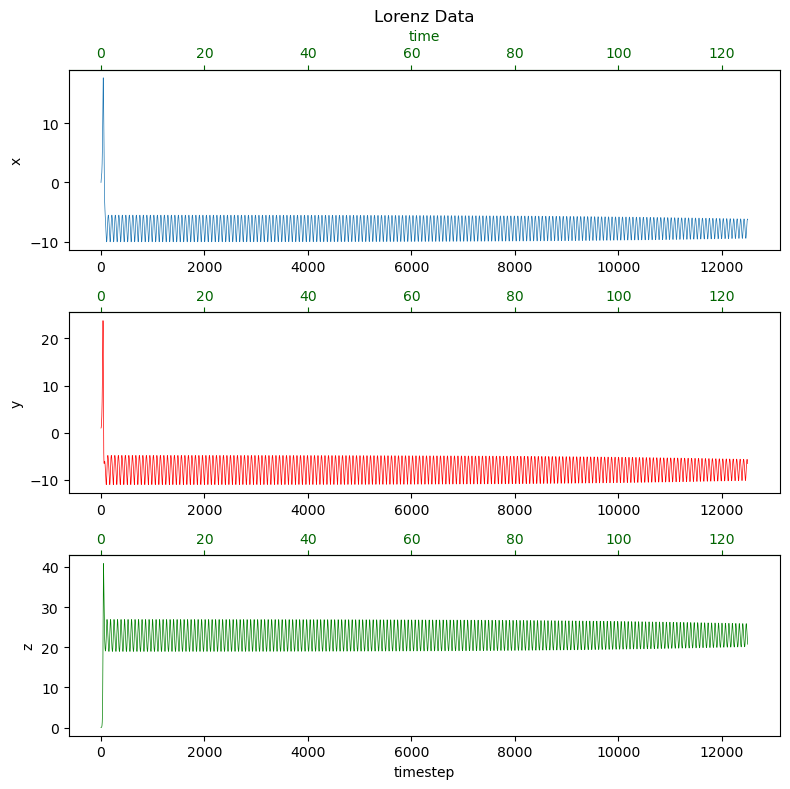

In [5]:
#######################################################################
# P L O T   D A T A   ( S U B S E T )
#######################################################################
my_title  = "Lorenz Data"
step_from = 0
step_to   = n_timesteps
my_lw     = 0.5 # line thickness
plot_data(X , my_title, step_from, step_to, my_lw)

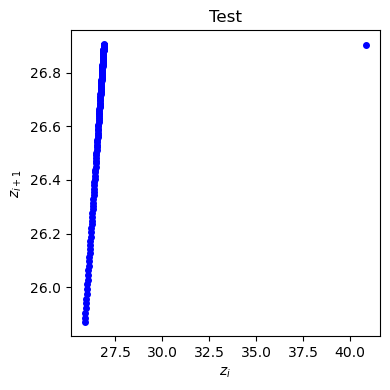

In [6]:
# Compute the return map of the z-coord of Lorenz system
# (test and predicted data)

from scipy.signal import find_peaks

test_z        = X[:, 2]

test_peaks, _ = find_peaks(test_z, height=0)
tpks_len      = len(test_peaks)

min_z_test    = min(test_z[test_peaks[0:tpks_len - 1]])
max_z_test    = max(test_z[test_peaks[1:tpks_len]])

fig, rtm = plt.subplots(1, 1, figsize=(4, 4))  

rtm.plot(test_z[test_peaks[0:tpks_len - 1]], test_z[test_peaks[1:tpks_len]],"o",
            color='blue', markersize=4,)
rtm.set_ylabel("$z_{i+1}$")
rtm.set_xlabel("$z_i$")
rtm.set_title("Test")

fig.tight_layout()
plt.show()

In [7]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 4.03e+00 s
